# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH PYTHON CHO KHOA HỌC DỮ LIỆU

## Thông tin đồ án

+ Chủ đề: **Tìm hiểu về giá thuê chung cư ở thành phố Hồ Chí Minh**
+ Github: [p4ds-final](https://github.com/vanhung4499/p4ds)

### Thông tin nhóm

Nhóm bao gồm các thanh vien:

| MSSV    | Họ và tên       |
|---------|-----------------|
| 1712222 | Nguyễn Văn Hùng |
| 20120401| Nguyễn Đức Việt |

## Môi trường làm việc

In [1]:
import sys
sys.executable

'/Users/viet/miniconda3/envs/min_ds-env/bin/python'

Môi trường làm việc mà em dùng:
+ OS: macOS
+ IDE: VSCode
+ Sử dụng mội trường `min_ds-env` như các bài lab

## Import and constant

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
DATA_CSV = './data/hcm-apartment-rent-data.csv'
plt.style.use("fivethirtyeight")

## 1. Thu thập dữ liệu

### 1.1. Chủ đề, mục đích và nguồn của dữ liệu?

+ Chủ đề em nhắm tới là về giá thuê chung cư ở thành phố Hồ Chí Minh.
+ Do tìm trên kaggle chỉ có duy nhất một bộ dữ liệu về giá thuê chung cư của thành phố Hồ Chí Minh nhưng đã cũ và em cảm thấy nó ít không đủ các cột nên em đã tự crawl dữ liệu từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), trang môi giới xếp top đầu trong lĩnh vực bất động sản ở Việt Nam trên [Google](https://www.google.com/search?q=thu%C3%AA+chung+c%C6%B0+h%E1%BB%93+ch%C3%AD+minh&oq=thu%C3%AA+chung+c%C6%B0&aqs=chrome.1.69i59l3j0i512l2j69i60l3.4604j0j7&sourceid=chrome&ie=UTF-8).
+ Mục đích của em khá đơn giản là để xem xét giá cả chung cư cho thuê ở TPHCM, vì trong thời gian tới em cũng sẽ tìm chỗ ở mới (làm trước sau dùng lại).

### 1.2. Người ta có cho phép sử dụng dữ liệu như thế này hay không?

+ Việc crawl dữ liệu từ Nhatot thông qua public API của Chotot, nên có thể xem là là được phép sử dụng dữ liệu!
+ Đối với project này nhằm mục đích nâng cao kiến thức, không phục vụ mục đích thương mại

### 1.3. Thu thập dữ liệu này như thế nào?

+ Dữ liệu được crawl từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), là trang môi giới về bất động sản lớn ở Việt Nam, web có rất nhiều tin cho thuê nhà.
+ Crawl toàn bộ 1000 trang thu về gần 20000 record.
+ Chi tiết về cách crawl được mô tả ở file notebook `crawl-data.ipynb`.

## 2. Khám phá dữ liệu

### 2.1. Đọc dữ liệu

In [4]:
apartment_df = pd.read_csv(DATA_CSV)
apartment_df.head()

,ad_id,list_id,list_time,subject,body,price,price_string,size,rooms,toilets,...,region_name,ward_name,street_name,deposit,zero_deposit,longitude,latitude,owner,company_ad,apartment_type
0,153418031,112852992,1703585725000,"🏡DUPLEX MỚI FULL NT GIÁP HÀ HUY GIÁP, GẦN TRƯỜ...","DUPLEX MỚI FULL NỘI THẤT GIÁP HÀ HUY GIÁP, GẦN...",3500000.0,"3,5 triệu/tháng",28.0,1,1.0,...,Tp Hồ Chí Minh,Phường Thạnh Lộc,"Đường Thạnh Lộc 18, Phường Thạnh Lộc, Quận 12,...",0,False,106.68240,10.866300,False,True,Duplex
1,148983771,109051906,1703234722000,"1 PHÒNG NGỦ TÁCH BẾP 45M2, CHO NUÔI PET!",CĂN HỘ CAO CẤP 1 PHÒNG NGỦ!__45M2\n✓BAN CÔNG L...,8600000.0,"8,6 triệu/tháng",45.0,1,1.0,...,Tp Hồ Chí Minh,Phường Thảo Điền (Quận 2 cũ),Nguyễn Văn Hưởng,8600000,False,106.72764,10.815886,False,True,"Căn hộ dịch vụ, mini"
2,153418053,112853008,1703585761000,"Cho thuê 1-2-3PN Kingdom 101,Quận 10,Nhà mới,7...",🌆 Kingdom101 334 Tô Hiến Thành Q10🌇\nCập Nhật ...,16500000.0,"16,5 triệu/tháng",78.0,2,2.0,...,Tp Hồ Chí Minh,Phường 14,Tô Hiến Thành,0,False,106.66210,10.774700,False,True,Chung cư
3,153418055,112853009,1703585764000,Căn hộ giá rẻ ở liền quận 11 từ 8.5tr /2PN trố...,Cần cho thuê một số căn hộ chung cư giá rẻ ở l...,8500000.0,"8,5 triệu/tháng",68.0,2,2.0,...,Tp Hồ Chí Minh,Phường 5,Lạc Long Quân,1,False,106.64740,10.774000,False,True,Chung cư
4,153571175,112984090,1704079903000,"Cho thuê căn hộ Hausneo q9, 2pn,2wc,9tr","Cho thuê căn hộ HAUSNEO 2pn,2wc\n👉Giá: 9 triệu...",9000000.0,9 triệu/tháng,78.0,2,2.0,...,Tp Hồ Chí Minh,Phường Phú Hữu (Quận 9 cũ),Đường số 11,0,False,106.78910,10.800800,False,True,Chung cư


### 2.2. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
apartment_df.shape

(19887, 21)

Dữ liệu gồm 19996 dòng và 21 cột, đúng như những gì đã thu thập trước đó

### 2.3. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

+ Mỗi dòng là thông tin cho thuê của một căn hộ như giá thuê, diện tích, số phòng, số nhà vệ sinh, địa chỉ,...
+ Dựa theo thông tin trên web lúc crawl thì sẽ không có các dòng có ý nghĩa khác nhau.

### 2.4. Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột:

| Column         | Description                                |
|----------------|--------------------------------------------|
| ad_id          | id của tin (để phân biệt)                  |
| list_id        | id trong danh sách ads (dùng để phân biệt) |
| list_time      | Thời gian đăng tin                         |
| price          | Giá thuê (VND)                             |
| price_string   | Giá thuê (triệu / tháng)                   |
| size           | Diện tích (m2)                             |
| rooms          | Số phòng                                   |
| toilets        | Số nhà vệ sinh                             |
| body           | Mô tả                                      |
| street_name    | Đường                                      |
| ward_name      | Phường                                     |
| area_name      | Quận huyện                                 |
| region_name    | Thành phố, tỉnh                            |
| zero_deposit   | Có cần tiền cọc không?                     |
| deposit        | Tiền cọc                                   |
| longitude      | Kinh độ                                    |
| latitude       | Vĩ độ                                      |
| owner          | Có phải chủ nhà không?                     |
| company_ad     | Tin của các nhân hay công ty               |
| apartment_type | Kiểu căn hộ / chung cư                     |

### 2.4. Kiểm tra dữ liệu có bị trùng lặp không?

In [6]:
apartment_df.duplicated().sum()

0

Dữ liệu thu thập được không bị trùng lặp, dựa vào việc crawl trước đó nên có thể yên tâm

### 2.5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19887 entries, 0 to 19886
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_id           19887 non-null  int64  
 1   list_id         19887 non-null  int64  
 2   list_time       19887 non-null  int64  
 3   subject         19887 non-null  object 
 4   body            19887 non-null  object 
 5   price           19884 non-null  float64
 6   price_string    19884 non-null  object 
 7   size            19887 non-null  float64
 8   rooms           19887 non-null  int64  
 9   toilets         19886 non-null  float64
 10  area_name       19887 non-null  object 
 11  region_name     19887 non-null  object 
 12  ward_name       19876 non-null  object 
 13  street_name     19875 non-null  object 
 14  deposit         19887 non-null  int64  
 15  zero_deposit    19887 non-null  bool   
 16  longitude       19883 non-null  float64
 17  latitude        19883 non-null 

Nhận thấy một số vấn đè như sau:
+ Cột `toilets`, `price` là số nhà vệ sinh nên có kiểu dữ liệu `int64`
+ Cột `list_time` là thời gian đăng tin nên có kiểu `datetime`
+ Cột `ad_id`, `list_id`, `company_ad`, sẽ không còn cần thiết
+ Cột `size`, `price`, `toilets`, `area_name` có bị thiếu nên ta sẽ loại bỏ những dòng thiếu này

In [8]:
# convert timestamp in milisecond to datetime
apartment_df['list_time'] = pd.to_datetime(apartment_df['list_time'], unit='ms')

In [9]:
# drop missing value
apartment_df = apartment_df.dropna()
# drop not used column
apartment_df = apartment_df.drop(['ad_id', 'list_id', 'company_ad'], axis=1)
apartment_df.shape

(19862, 18)

Còn lại 19862 dòng

In [10]:
# convert float64 to int64
apartment_df['toilets'] = apartment_df['toilets'].apply(np.int64)
apartment_df['price'] = apartment_df['price'].apply(np.int64)

In [11]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19862 entries, 0 to 19886
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   list_time       19862 non-null  datetime64[ns]
 1   subject         19862 non-null  object        
 2   body            19862 non-null  object        
 3   price           19862 non-null  int64         
 4   price_string    19862 non-null  object        
 5   size            19862 non-null  float64       
 6   rooms           19862 non-null  int64         
 7   toilets         19862 non-null  int64         
 8   area_name       19862 non-null  object        
 9   region_name     19862 non-null  object        
 10  ward_name       19862 non-null  object        
 11  street_name     19862 non-null  object        
 12  deposit         19862 non-null  int64         
 13  zero_deposit    19862 non-null  bool          
 14  longitude       19862 non-null  float64       
 15  latitud

Sau khi xử lý, dữ liệu đã khá ổn

### 2.6. Với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bố như thế nào?

In [12]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

numeric_cols = ['price', 'size', 'rooms', 'toilets', 'deposit']
apartment_df[numeric_cols].describe()

,price,size,rooms,toilets,deposit
count,"19,862","19,862","19,862","19,862","19,862"
mean,"16,388,876",60,2,1,"5,079,027"
std,"329,925,170",606,1,1,"10,839,077"
min,"500,000",3,1,1,0
25%,"5,500,000",35,1,1,0
50%,"7,500,000",50,1,1,0
75%,"11,500,000",70,2,2,"6,000,000"
max,"31,000,000,000","80,000",11,7,"340,000,000"


Nhận ra ngay **min** và **max** của `price`, `size`, `deposit` có vấn đề:
 + Sự xuất hiện của các giá trị **min** và **max** không thực tế trong các thuộc tính `price`, `size`, và `deposit`. 
 + Làm gì có căn hộ nào mà thuê 500,000 VND/tháng, diện tích có 3 m², dự đoán là tin rác, hoặc người dùng nhập sai.
 + Làm gì có ai thuê căn hộ nào thuê mà 80000 m², giá thuê 31 tỷ/tháng, cọc 340 triệu, dự đoán bán là đất nền nhưng đăng nhầm qua cho thuê chung cư.

Các cột còn lại phân bố bình thường:
 + rooms từ 1 &rarr; 11.
 + toilets từ 1 &rarr; 7.
 
Với mục tiêu nghiên cứu về giá chung cư, việc loại bỏ các giá trị ngoại lệ là cần thiết để đảm bảo tính chính xác và hợp lý của dữ liệu. Dưới đây là một số điều kiện để loại bỏ giá trị ngoại lệ:
 + Loại bỏ các bản ghi có giá thuê dưới 500,000 VND/tháng, vì giá này thường không phản ánh thị trường chung cư hiện nay.
 + Loại bỏ các bản ghi có giá thuê cao hơn 100 triệu VND/tháng, vì giá này có vẻ quá cao so với giá trung bình của thị trường.
 + Loại bỏ các bản ghi có diện tích dưới 10 m², vì diện tích nhỏ như vậy thường không thích hợp cho một căn hộ sống.

Quá trình này sẽ giúp làm sạch dữ liệu và tạo ra một tập dữ liệu hợp lý hơn để nghiên cứu về giá chung cư, bỏ qua những giá trị không thực tế hoặc có vẻ là thông tin đăng tin không chính xác.

In [13]:
index = apartment_df[(apartment_df['price'] < 500000) | (apartment_df['price'] > 100000000) | (apartment_df['size'] < 10)].index
apartment_df.drop(index, inplace=True)

apartment_df.shape

(19829, 18)

### 2.7. Với mỗi cột có kiểu dữ liệu categorical, các giá trị được phân bố như thế nào?

#### Cột **region_name**

In [14]:
apartment_df['region_name'].value_counts()

region_name
Tp Hồ Chí Minh    19829
Name: count, dtype: int64

Do ta chỉ xem xét ở TP HCM nên cột này chỉ có duy nhất một giá trị, tiến hành loại bỏ cột này.

In [15]:
apartment_df = apartment_df.drop(['region_name'], axis=1)

#### Cột **area_name**

<Axes: title={'center': 'Distribution of area_name'}, xlabel='area_name'>

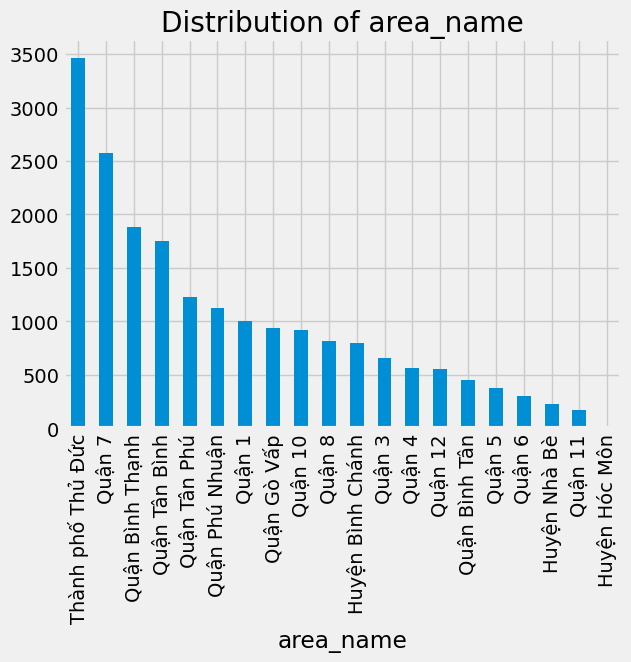

In [16]:
area = apartment_df['area_name'].value_counts()
area.plot.bar(title='Distribution of area_name')

Trên đây là phân bố căn hộ cho thuê theo quận sắp xếp theo số lượn giảm dần:
+ Nhiều nhất là thành phố Thủ Đức(quận Thủ Đức + quận 9 + quận 2 cũ) có diện tích lớn với gần 3500 tin cho thuê, tiếp theo là quận 7 (2500 tin).
+ Các quận huyện còn lại phân bố đều.
+ Huyện Hóc Môn đứng cuối bảng và không có tin đăng nào gần đây.

#### Cột **owner**

In [17]:
apartment_df['owner'].value_counts()

owner
False    19829
Name: count, dtype: int64

Tất cả đề là False, có nghĩa là không có chủ nhà nào đăng tin cho thuê, tất cả đều là môi giới, nếu thuê thì sẽ khó thương lượng giảm giá với chủ nhà đuợc vì họ thường phải trả cho môi giới một khoản phí. Ta cũng loại bỏ cột này luôn.

In [18]:
apartment_df = apartment_df.drop(['owner'], axis=1)

#### Cột **apartment_type**

Gồm các loại căn hộ như sau:

In [19]:
apartment_df['apartment_type'].unique()

array(['Duplex', 'Căn hộ dịch vụ, mini', 'Chung cư', 'Officetel',
       'Penthouse', 'Tập thể, cư xá'], dtype=object)

(18805, 16)


<Axes: title={'center': 'Number of apartments per type'}, xlabel='apartment_type'>

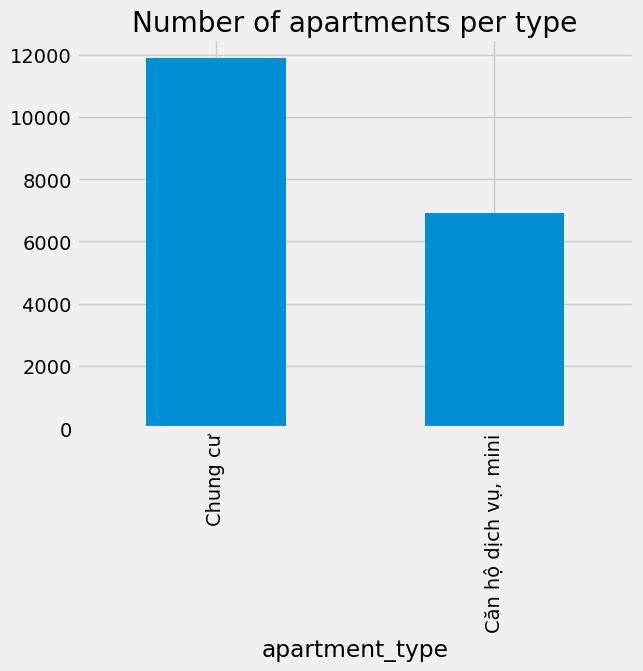

In [20]:
apartment_df = apartment_df[(apartment_df['apartment_type'] == 'Chung cư') | (apartment_df['apartment_type'] == 'Căn hộ dịch vụ, mini')]

print(apartment_df.shape)

type = apartment_df['apartment_type'].value_counts()

type.plot.bar(title="Number of apartments per type")

Sau khi lọc, chỉ còn 18805 dòng, bao gồm **Chung cư** với gần 12000 dòng, số còn lại là **Căn hộ dịch vụ, mini**(gần 7000 dòng).

#### Cột **zero_deposit**

In [21]:
apartment_df['zero_deposit'].value_counts()

zero_deposit
False    18805
Name: count, dtype: int64

Tất cả chủ nhà đều yêu cầu tiền cọc, vì vậy ta cũng sẽ bỏ qua cột này!

In [22]:
apartment_df = apartment_df.drop(['zero_deposit'], axis=1)

#### Cột **list_time**

In [23]:
pd.to_datetime(apartment_df['list_time']).dt.date.value_counts()

list_time
2024-01-04    2515
2024-01-03    2051
2024-01-02    1919
2024-01-05    1324
2023-12-26    1278
2023-12-30    1254
2023-12-27    1202
2023-12-29    1190
2023-12-25    1146
2023-12-28    1110
2023-12-31     895
2023-12-23     889
2023-12-24     693
2024-01-01     677
2023-12-22     609
2023-12-21      53
Name: count, dtype: int64

Các tin được đăng từ 21/12/2023 tới 4/1/2024, trong khoảng 2 tuần, nên có thể coi dữ liệu là mới, tính ở thời điểm phân tích là ngày 9/1/2024. Ta cũng có thể bỏ cột này luôn vì nó không có quá nhiều ý nghĩa khi gần nhau.

In [24]:
apartment_df = apartment_df.drop(['list_time'], axis=1)

## 3. Đặt ra các câu hỏi?

### Câu 1. Giá thuê căn hộ ở các quận chênh lệch như thế nào?

**Ý nghĩa**: Có cái nhìn tổng quát về giá thuê nhà tại các quận, giá theo diện tích, theo số phòng, theo loại hình để có thể xem xét và đưa ra quyết định nên thuê ở đâu, các đặc điểm của căn hộ ra sao.

### Câu 2. Các yếu tố ảnh hưởng tới giá thuê nhà?

**Ý nghĩa**: Để hiểu thêm về sự tương quan giữa giá thuê với các yếu tố khác như diện tích, số phòng, số nhà vệ sinh, vị trí, ...

### Câu 3. Tìm một căn hộ phù hợp để thuê theo một số tiêu chí?

**Ý nghĩa**: thực tế chỉ là để tham khảo chọn phòng để thuê

## 4. Phân tích dữ liệu và trả lời từng câu hỏi

### Câu 1: Giá thuê căn hộ ở các quận chênh lệch như thế nào?

Ta sẽ tổng hợp lại dữ liệu theo các quận, rồi tìm ra min-max và avg price theo số phòng, min-max theo size

In [25]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

res = apartment_df.groupby(['area_name']).agg({ 'price': ['min', 'max', 'mean', 'count'], 'size': ['min', 'max'] })
print('Mean, min, and max price grouped by area_name')
res

Mean, min, and max price grouped by area_name


price                             size       
                       min        max       mean count  min    max
area_name                                                         
Huyện Bình Chánh   1700000   18000000  6,964,692   795   16    127
Huyện Hóc Môn      3700000    5500000  4,500,000     8   25     70
Huyện Nhà Bè       1300000   23000000 10,958,652   230   10    360
Quận 1             1200000   98000000 10,979,610   982   10    178
Quận 10            1200000   38000000 10,333,359   895   10    247
Quận 11            3500000   19000000  7,424,699   153   18    120
Quận 12            1700000   12000000  6,209,808   525   14    180
Quận 3             3000000   35000000  8,629,733   649   10    135
Quận 4              750000   50000000 14,294,583   528   15    200
Quận 5             2500000   30000000 12,429,033   361   20    132
Quận 6             2500000   20000000  8,530,269   297   15    112
Quận 7              750000   75000000 10,193,505  2393   15    250
Quận 8             2000000   25000000  8,080,749   772   12    535
Quận Bình Thạnh     900000  100000000  9,092,063  1750   10 30,000
Quận Bình Tân      2100000   35000000  6,338,747   407   15    800
Quận Gò Vấp        1400000   18000000  5,659,306   880   15    113
Quận Phú Nhuận     3200000   28000000  9,212,138  1071   15 80,000
Quận Tân Bình      1700000   35000000  7,714,862  1640   16    525
Quận Tân Phú       2400000   65000000  8,870,824  1104   15    220
Thành phố Thủ Đức   500000   93000000 12,273,653  3365   10    335

Từ dữ liệu trên, ta thấy Quận 4 có giá nhà trung bình cao nhất, với mức 14,294,583 VND, còn huyện Hóc Môn có giá nhà trung bình thấp nhất với 4,500,000 VND. Sự chênh lệch này có thể dễ dàng lý giải vì Quận 4 nằm ở trung tâm thành phố nên sẽ có giá cho thuê cao hơn.
Một số quận như Quận 4, Quận 7 và Thành phố Thủ Đức có phân phối giá thuê rộng,có thể là do sự đa dạng trong loại hình và chất lượng căn hộ.
Nhìn chung, các quận ở gần trung tâm sẽ có giá cao hơn so với các quận ngoại thành.

### Câu 2: Các yếu tố ảnh hưởng tới giá thuê nhà?

Các yếu tố ảnh hưởng tới giá thuê nhà gồm: 

In [29]:
apartment_df

,subject,body,price,price_string,size,rooms,toilets,area_name,ward_name,street_name,deposit,longitude,latitude,apartment_type
1,"1 PHÒNG NGỦ TÁCH BẾP 45M2, CHO NUÔI PET!",CĂN HỘ CAO CẤP 1 PHÒNG NGỦ!__45M2\n✓BAN CÔNG L...,8600000,"8,6 triệu/tháng",45,1,1,Thành phố Thủ Đức,Phường Thảo Điền (Quận 2 cũ),Nguyễn Văn Hưởng,8600000,107,11,"Căn hộ dịch vụ, mini"
2,"Cho thuê 1-2-3PN Kingdom 101,Quận 10,Nhà mới,7...",🌆 Kingdom101 334 Tô Hiến Thành Q10🌇\nCập Nhật ...,16500000,"16,5 triệu/tháng",78,2,2,Quận 10,Phường 14,Tô Hiến Thành,0,107,11,Chung cư
3,Căn hộ giá rẻ ở liền quận 11 từ 8.5tr /2PN trố...,Cần cho thuê một số căn hộ chung cư giá rẻ ở l...,8500000,"8,5 triệu/tháng",68,2,2,Quận 11,Phường 5,Lạc Long Quân,1,107,11,Chung cư
4,"Cho thuê căn hộ Hausneo q9, 2pn,2wc,9tr","Cho thuê căn hộ HAUSNEO 2pn,2wc\n👉Giá: 9 triệu...",9000000,9 triệu/tháng,78,2,2,Thành phố Thủ Đức,Phường Phú Hữu (Quận 9 cũ),Đường số 11,0,107,11,Chung cư
5,ECO GREEN 3PN - NHÀ NTCB - SIÊU RỘNG RÃI VIEW ...,Cho thuê căn hộ 3PN 2WC tại Ecogreen\nGIÁ 15.5...,15500000,"15,5 triệu/tháng",95,3,2,Quận 7,Phường Tân Thuận Tây,Nguyễn Văn Linh,0,107,11,Chung cư
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19880,PKD TERRA Royal - Cho thuê nhiều căn 2 pn từ 1...,PKD TERRA Royal - Cho thuê nhiều căn 2 pn từ 1...,20000000,20 triệu/tháng,73,2,2,Quận 3,Phường Võ Thị Sáu,Lý Chính Thắng,40000000,107,11,Chung cư
19881,Lumiere Riverside_Cho thuê căn hộ 1PN_59m2_NTC...,🍀 ___LUMIERE RIVERSIDE___🍀\n\nCăn hộ cho thuê ...,20000000,20 triệu/tháng,59,1,1,Thành phố Thủ Đức,Phường An Phú (Quận 2 cũ),Xa Lộ Hà Nội,0,107,11,Chung cư
19883,🌱🌱 Đầu tháng trống căn hộ 1 phòng ngủ tại Thảo...,🌱Căn hộ cho thuê cực sang - xịn Full nội thất ...,10000000,10 triệu/tháng,55,1,1,Thành phố Thủ Đức,Phường Thảo Điền (Quận 2 cũ),Đường Số 64,10000000,107,11,"Căn hộ dịch vụ, mini"
19884,[HCM] Cho thuê căn hộ 2PN - 2WC Lovera Vista K...,"* Dự án: Khu căn hộ Lovera Vista, khu dân cư P...",9999999,10 triệu/tháng,65,2,1,Huyện Bình Chánh,Xã Phong Phú,Trịnh Quang Nghị,10000000,107,11,Chung cư


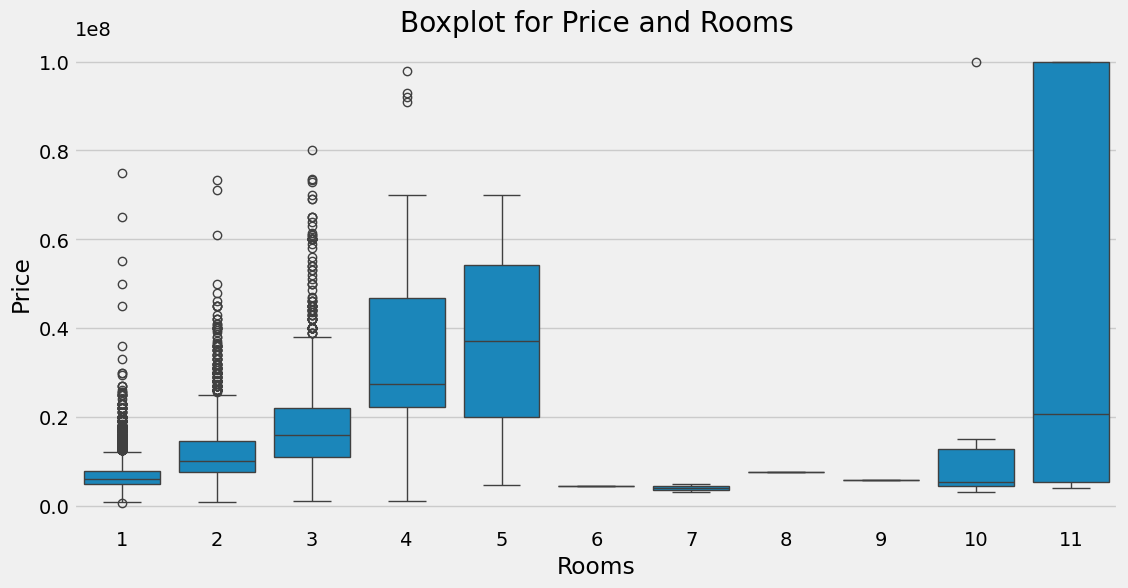

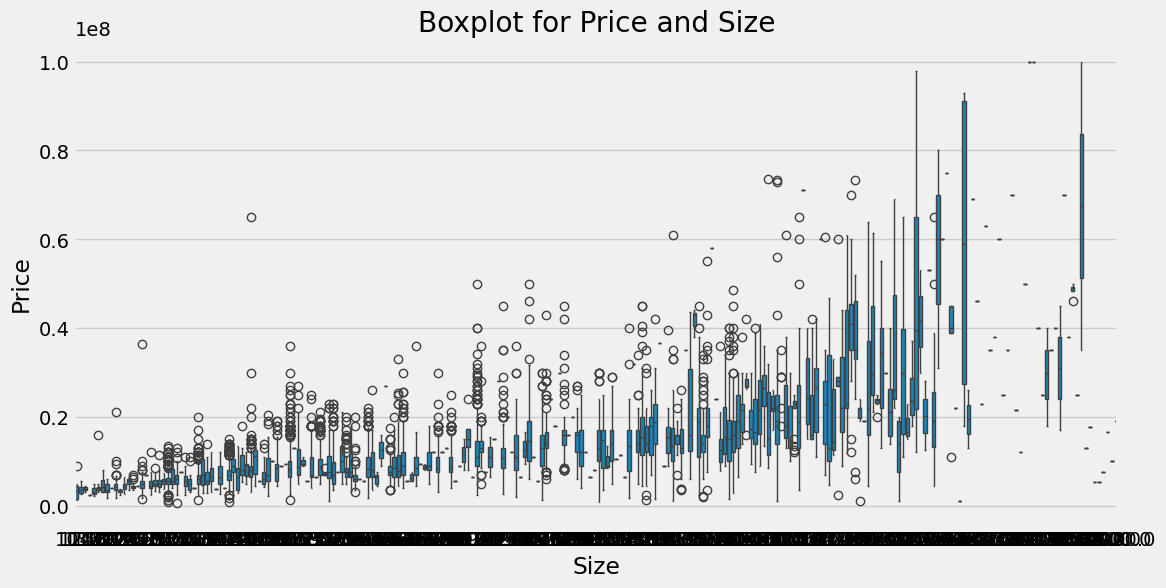

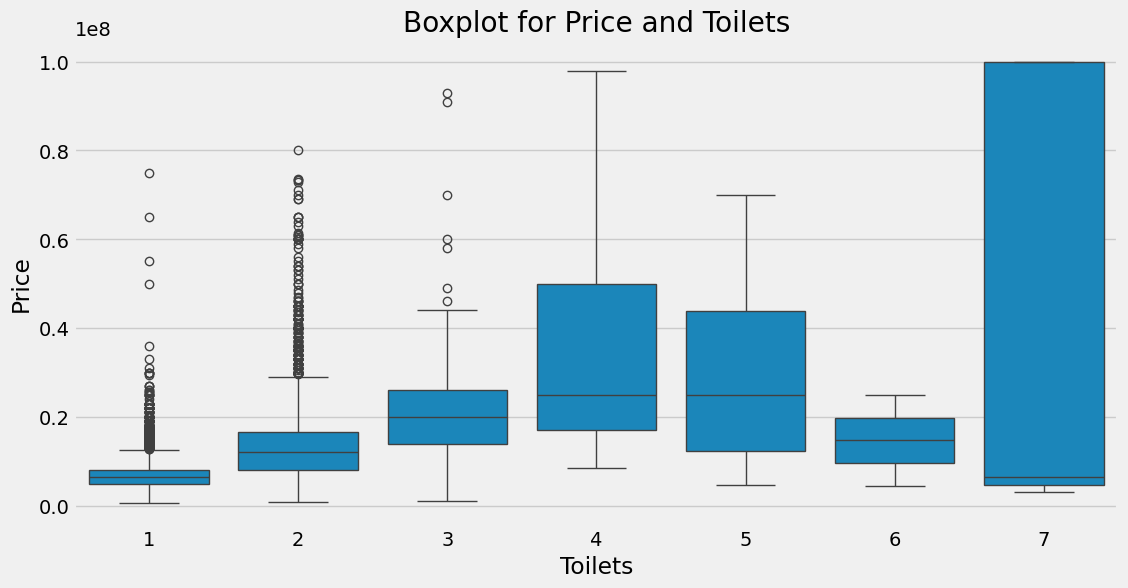

In [28]:
# Boxplot for Price and Rooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='rooms', y='price', data=apartment_df)
plt.title('Boxplot for Price and Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

# Boxplot for Price and Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', y='price', data=apartment_df)
plt.title('Boxplot for Price and Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# Boxplot for Price and Toilets
plt.figure(figsize=(12, 6))
sns.boxplot(x='toilets', y='price', data=apartment_df)
plt.title('Boxplot for Price and Toilets')
plt.xlabel('Toilets')
plt.ylabel('Price')
plt.show()

## 5. Tổng hợp lại quá trình thực hiện đồ án